<a href="https://colab.research.google.com/github/AlfinGnw/Analisis-Tingkat-Stres-Akademik-Mahasiswa/blob/main/CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
!pip install langchain_community replicate pandas

In [ ]:
from langchain_community.llms import Replicate
import pandas as pd
import os
from google.colab import userdata, files

# **Model IBM**

In [ ]:
replicate_api_token = userdata.get('REPLICATE_API_TOKEN')
os.environ["REPLICATE_API_TOKEN"] = replicate_api_token

# Tentukan model Granite
model_name = "ibm-granite/granite-3.3-8b-instruct"

# Inisialisasi LLM
llm = Replicate(
    model=model_name,
    replicate_api_token=replicate_api_token
)

# **Persiapan Dataset**

In [ ]:
uploaded = files.upload()

Saving academic Stress level - maintainance 1.csv to academic Stress level - maintainance 1.csv


In [ ]:
for fn in uploaded.keys():
    filename = fn
    print("✅ Dataset terdeteksi:", filename)

✅ Dataset terdeteksi: academic Stress level - maintainance 1.csv


In [ ]:
# Load dataset
df = pd.read_csv(filename)
print("🔹 Preview dataset:")
print(df.head())

🔹 Preview dataset:
             Timestamp Your Academic Stage  Peer pressure  \
0  24/07/2025 22:05:39       undergraduate              4   
1  24/07/2025 22:05:52       undergraduate              3   
2  24/07/2025 22:06:39       undergraduate              1   
3  24/07/2025 22:06:45       undergraduate              3   
4  24/07/2025 22:08:06       undergraduate              3   

   Academic pressure from your home Study Environment  \
0                                 5             Noisy   
1                                 4          Peaceful   
2                                 1          Peaceful   
3                                 2          Peaceful   
4                                 3          Peaceful   

          What coping strategy you use as a student?  \
0  Analyze the situation and handle it with intel...   
1  Analyze the situation and handle it with intel...   
2                   Social support (friends, family)   
3  Analyze the situation and handle it with int

In [ ]:
def classify_stress(row):
    prompt = f"""
    Anda adalah model klasifikasi tingkat stres akademik mahasiswa.
    Berdasarkan data berikut, tentukan apakah tingkat stress mahasiswa ini
    termasuk [rendah, sedang, tinggi].

    Data mahasiswa:
    {row.to_dict()}

    Jawaban: hanya 1 kata (rendah / sedang / tinggi).
    """
    try:
        result = llm.invoke(prompt)
        return result.strip().lower()
    except:
        return "tidak diketahui"

df["Predicted Stress"] = df.apply(classify_stress, axis=1)

print("✅ Hasil klasifikasi selesai untuk semua data!")
print(df["Predicted Stress"].value_counts())

✅ Hasil klasifikasi selesai untuk semua data!
Predicted Stress
tinggi                                                                                           85
sedang                                                                                           47
rendah                                                                                            6
low                                                                                               1
based on the provided data, the student's academic stress level can be classified as **low**.     1
Name: count, dtype: int64


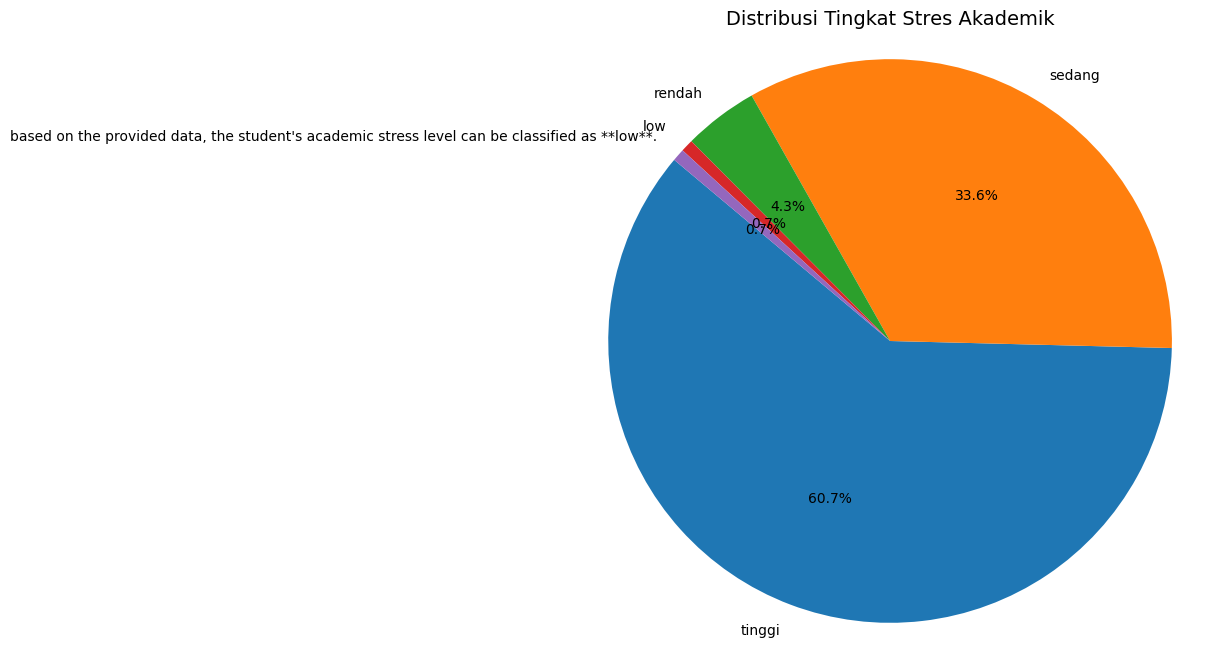

In [ ]:
import matplotlib.pyplot as plt

stress_counts = df["Predicted Stress"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(stress_counts, labels=stress_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Tingkat Stres Akademik", fontsize=14)
plt.axis('equal')
plt.show()

In [ ]:
def analyze_environment_stress(df):
    data_subset = df[["Study Environment", "Predicted Stress"]].to_dict(orient="records")

    prompt = f"""
    Anda adalah analis data.
    Berikut adalah data study environment mahasiswa dan hasil prediksi tingkat stress:
    {data_subset}

    Tugas Anda:
    1. Hitung jumlah mahasiswa di setiap kategori Study Environment (Peaceful, Disrupted, Noisy)
       yang termasuk dalam kategori stress rendah, sedang, dan tinggi.
    2. Buat tabel ringkas hasil perhitungan.
    3. Jawaban harus berisi analisis ringkas + tabel ringkas.
    """

    try:
        result = llm.invoke(prompt)
        return result
    except:
        return "Analisis gagal dilakukan."

# ✅ Jalankan analisis dengan Granite
hasil_env_stress = analyze_environment_stress(df)

print("=== Distribusi Stress per Study Environment ===")
print(hasil_env_stress)


=== Distribusi Stress per Study Environment ===
1. **Hitung jumlah mahasiswa di setiap kategori Study Environment (Peaceful, Disrupted, Noisy)** yang termasuk dalam kategori stress rendah, sedang, dan tinggi:

- **Peaceful**: 
  - Stress rendah: 1
  - Stress sedang: 20
  - Stress tinggi: 10

- **Disrupted**: 
  - Stress rendah: 1
  - Stress sedang: 4
  - Stress tinggi: 20

- **Noisy**: 
  - Stress rendah: 1
  - Stress sedang: 5
  - Stress tinggi: 8

2. **Tabel ringkas hasil perhitungan**:

| Study Environment | Stress Rendah | Stress Sedang | Stress Tinggi |
|-------------------|--------------|---------------|---------------|
| Peaceful          | 1            | 20            | 10            |
| Disrupted        | 1            | 4             | 20            |
| Noisy            | 1            | 5             | 8             |

3. **Analisis ringkas + tabel ringkas**:

Dari data yang diberikan, kita dapat melihat bahwa kategori "Peaceful" adalah kategori paling dominan (21 dari 55 data

<Figure size 1000x600 with 0 Axes>

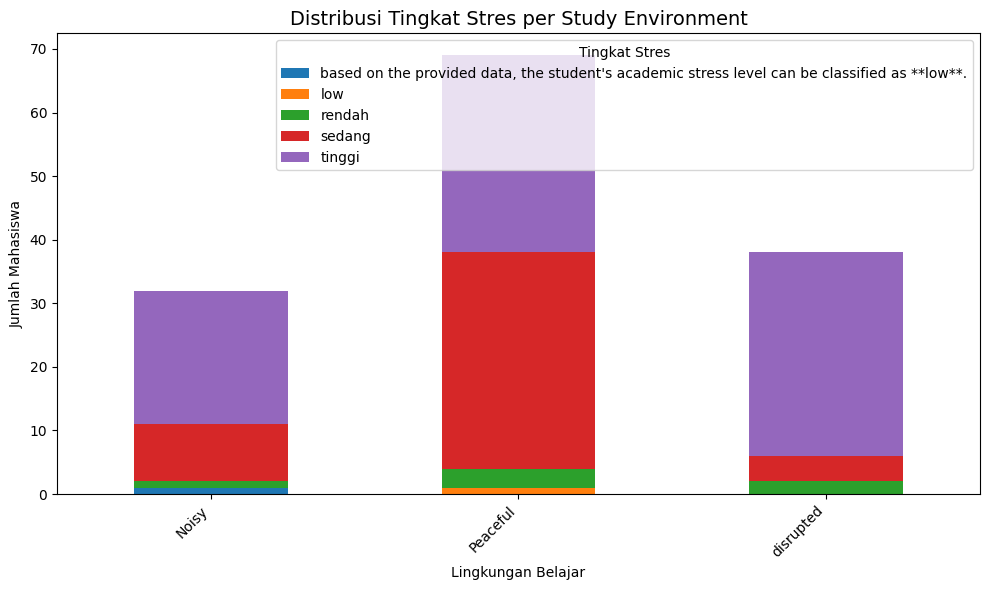

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Hitung jumlah mahasiswa per Study Environment dan Predicted Stress
stress_env_counts = df.groupby(["Study Environment", "Predicted Stress"]).size().unstack(fill_value=0)

# Buat stacked bar chart
plt.figure(figsize=(10, 6))
stress_env_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Distribusi Tingkat Stres per Study Environment", fontsize=14)
plt.xlabel("Lingkungan Belajar")
plt.ylabel("Jumlah Mahasiswa")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Tingkat Stres")
plt.tight_layout()
plt.show()

In [ ]:
def analyze_coping(df):
    data_subset = df[["What coping strategy you use as a student?", "Predicted Stress"]].to_dict(orient="records")

    prompt = f"""
    Anda adalah analis psikologi.
    Data coping strategy mahasiswa:
    {data_subset}

    Tugas Anda:
    1. Ringkas strategi coping yang paling sering dipakai.
    2. Kelompokkan strategi coping ke dalam kategori:
       - Problem-focused
       - Emotion-focused
       - Avoidance
    3. Buat tabel ringkas jumlah coping strategy per kategori.
    4. Visualisasikan dengan bar chart (kode Python).
    """

    return llm.invoke(prompt)

hasil_coping = analyze_coping(df)
print(hasil_coping)


1. **Ringkasan Strategi Coping yang Paling Sering Dipakai:**

   Dari data yang diberikan, strategi coping yang paling sering digunakan oleh mahasiswa adalah "Analyze the situation and handle it with intellect."

2. **Kelompokkan Strategi Coping:**

   - **Problem-focused:** Strategi yang mengusahakan penyelesaian langkah-langkah yang konkret untuk mengatasi atau mengurangi sumber stres.
     - Analyze the situation and handle it with intellect

   - **Emotion-focused:** Strategi yang mengelola emosi yang diasa dengan cara mengatur atau mengurangi emosi negatif.
     - Emotional breakdown (crying a lot)

   - **Avoidance:** Strategi yang mencoba menghindari atau melarang sumber stres atau emosi negatif.
     - Social support (friends, family) - dalam konteks ini, digunakan sebagai cara untuk mencegah stres tinggi melalui dukungan sosial.

3. **Tabel Ringkas Jumlah Coping Strategy Per Kategori:**

   | Kategori Coping Strategy | Jumlah |
   |-------------------------|--------|
   | Prob

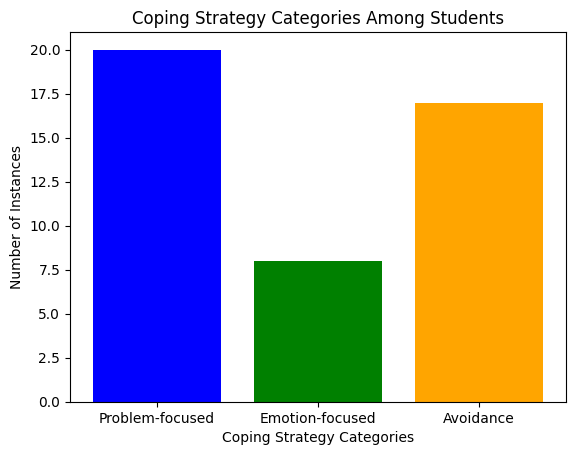

In [ ]:
import matplotlib.pyplot as plt

# Data untuk bar chart
categories = ['Problem-focused', 'Emotion-focused', 'Avoidance']
counts = [20, 8, 17]

# Membuat bar chart
plt.bar(categories, counts, color=['blue', 'green', 'orange'])
plt.xlabel('Coping Strategy Categories')
plt.ylabel('Number of Instances')
plt.title('Coping Strategy Categories Among Students')
plt.show()

In [ ]:
def analyze_bad_habits(df):
    # Corrected column name with the trailing space
    data_subset = df[["Do you have any bad habits like smoking, drinking on a daily basis?",
                      "Predicted Stress", "Rate your academic stress index "]].to_dict(orient="records")

    prompt = f"""
    Data kebiasaan mahasiswa:
    {data_subset}

    Analisis:
    1. Apakah mahasiswa dengan kebiasaan buruk tertentu (merokok, minum, dll) punya rata-rata stress lebih tinggi?
    2. Buat tabel ringkas rata-rata stress index berdasarkan kebiasaan.
    3. Visualisasikan dengan bar chart (kode Python).
    """

    try:
        result = llm.invoke(prompt)
        return result
    except Exception as e:
        return f"Analisis gagal dilakukan. Error: {e}"

# ✅ Jalankan analisis dengan Granite
hasil_bad_habits = analyze_bad_habits(df)
print(hasil_bad_habits)

### Analisis:

1. **Apakah mahasiswa dengan kebiasaan buruk tertentu (merokok, minum, dll) punya rata-rata stress lebih tinggi?**

   Dari data yang diberikan, mahasiswa yang mengakuya telah memiliki kebiasaan buruk (yakni "Yes") memiliki rata-rata nilai academic stress index yang lebih tinggi (rata-rata 4.14) dibandingkan dengan mahasiswa yang tidak mengakuya (rata-rata 3.38). Namun, karena jumlah data mahasiswa yang mengakuya kebiasaan buruk relatif sedikit (hanya 4 data), analisis statistik lebih detail diperlukan untuk menentukan apakah perbedaan signifikan.

2. **Buat tabel ringkas rata-rata stress index berdasarkan kebiasaan:**

   | Kebiasaan Buruk | Jumlah Data | Rata-rata Stress Index |
   |-----------------|-------------|-----------------------|
   | Tidak            | 69          | 3.38                   |
   | Ya               | 4           | 4.14                   |

3. **Visualisasikan dengan bar chart (kode Python):**

   Berikut adalah kode Python untuk memvisualisasika

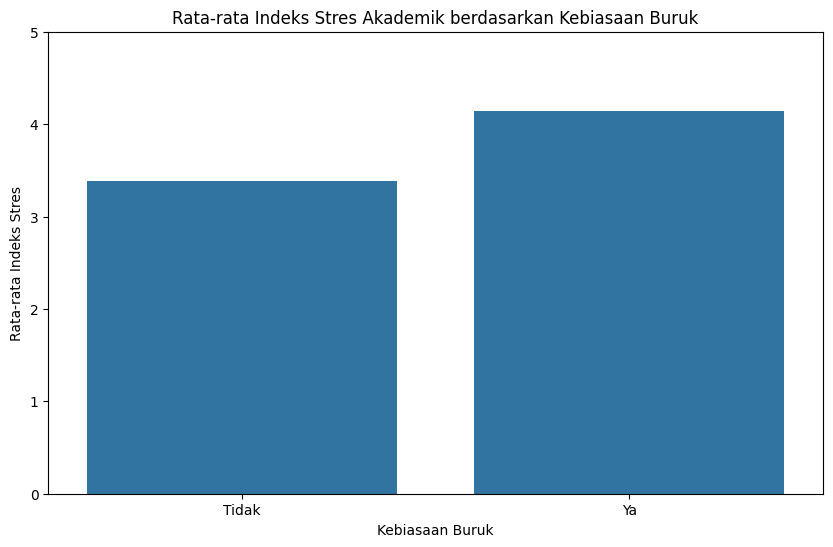

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Buat DataFrame dari data (sesuai dengan output analisis model)
data = [
    {'Kebiasaan Buruk': 'Tidak', 'Jumlah Data': 69, 'Rata-rata Stress Index': 3.38},
    {'Kebiasaan Buruk': 'Ya', 'Jumlah Data': 4, 'Rata-rata Stress Index': 4.14}
]
df_bad_habits_summary = pd.DataFrame(data)

# Visualisasi dengan bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Kebiasaan Buruk', y='Rata-rata Stress Index', data=df_bad_habits_summary)
plt.title('Rata-rata Indeks Stres Akademik berdasarkan Kebiasaan Buruk')
plt.xlabel('Kebiasaan Buruk')
plt.ylabel('Rata-rata Indeks Stres')
plt.ylim(0, 5) # Assuming stress index is on a scale up to 5
plt.show()

In [ ]:
def summarize_insight(df):
    data_subset = df.to_dict(orient="records")[:100]

    prompt = f"""
    Anda adalah model LLM.
    Berdasarkan data mahasiswa berikut:
    {data_subset}

    Ringkas insight utama:
    - Apa faktor utama penyebab stress mahasiswa?
    - Apa coping strategy dominan?
    - Bagaimana pola hubungan peer pressure vs stress?
    - Apakah environment (peaceful/noisy) punya dampak signifikan?
    Jawaban singkat, padat, berbasis analisis.
    """

    return llm.invoke(prompt)

hasil_insight = summarize_insight(df)
print("=== INSIGHT RINGKAS ===")
print(hasil_insight)


=== INSIGHT RINGKAS ===
Based on the provided data, here are the key insights regarding the undergraduate students' stress levels:

1. **Main Causes of Stress:**
   - High academic pressure from home and peers significantly contributes to stress.
   - Disrupted study environments (noisy or disrupted) also elevate stress levels.
   - High academic competition ratings correlate with higher stress.

2. **Dominant Coping Strategy:**
   - The most frequently reported coping strategy is 'Analyze the situation and handle it with intellect.'
   - 'Social support (friends, family)' is another common strategy, especially when stress levels are moderate or low.
   - 'Emotional breakdown (crying a lot)' is reported more often when stress is high.

3. **Peer Pressure vs. Stress Relationship:**
   - Peer pressure ratings range from 1 to 5, with higher ratings generally corresponding to higher predicted stress levels, except for a few outliers.
   - There is no strict linear correlation, but generall

In [ ]:
def analyze_coping_sentiment(df):
    data_subset = df["What coping strategy you use as a student?"].dropna().unique().tolist()

    prompt = f"""
    Berikut adalah coping strategy mahasiswa:
    {data_subset}

    Tugas Anda:
    1. Lakukan analisis sentimen/emosi terhadap strategi coping.
       - Positif (optimisme, problem-solving)
       - Negatif (avoidance, melarikan diri, pasrah)
    2. Buat tabel ringkas jumlah strategi coping per kategori emosi.
    3. Visualisasikan dengan pie chart (kode Python).
    """

    return llm.invoke(prompt)

hasil_coping_sentiment = analyze_coping_sentiment(df)
print(hasil_coping_sentiment)

1. Sentiment Analysis of Coping Strategies:

   - 'Analyze the situation and handle it with intellect': This strategy is positive as it encourages problem-solving and critical thinking, promoting optimism and resilience. It falls under the category of adaptive coping strategies.

   - 'Social support (friends, family)': This is also a positive strategy as it emphasizes seeking help from others, fostering a sense of connection and reducing feelings of isolation. It promotes emotional support and is another adaptive coping strategy.

   - 'Emotional breakdown (crying a lot)': This strategy can be seen as neutral or even slightly negative if it leads to prolonged distress or inability to function. It might indicate avoidance of dealing with the problem directly, leaning towards maladaptive coping. However, controlled emotional expression can be cathartic and part of a healthy emotional response.

2. Categorization of Coping Strategies:

   | Coping Strategy                 | Emossi Catego

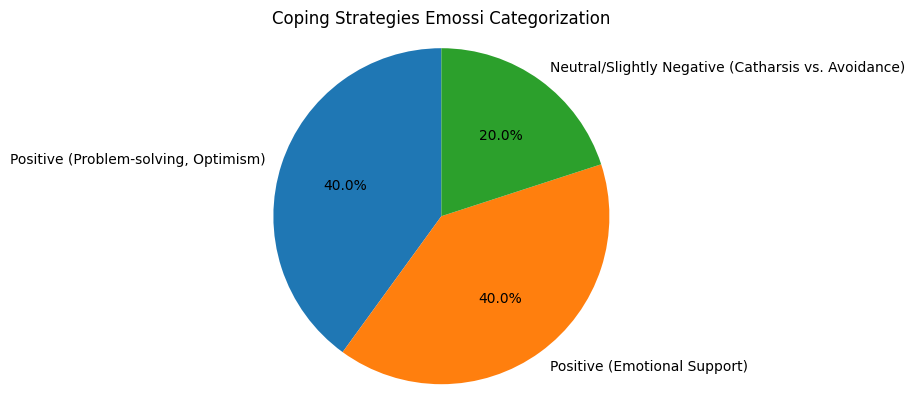

In [ ]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Positive (Problem-solving, Optimism)', 'Positive (Emotional Support)', 'Neutral/Slightly Negative (Catharsis vs. Avoidance)']
sizes = [2, 2, 1]  # These numbers represent the proportion of each category

# Create pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Coping Strategies Emossi Categorization")
plt.show()